In [ ]:
#모델 돌리기

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')

#데이터 입력
df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/csv/PA_inhibitor_descriptor_internal_dataset.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/csv/PA_inhibitor_descriptor_external_dataset.csv')
df2 = pd.concat([df, df1])

#데이터 분류
dataset = df.values
X = dataset[:,0:-1]
Y = dataset[:,-1]
ex_data =df1.values
exX = ex_data[:,0:-1]
exY = ex_data[:,-1]

tot_data = df2.values
totX = tot_data[:,0:-1]
totY = tot_data[:,-1]

#X 표준화

scaler =  RobustScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
exX_scaled = scaler.transform(exX)
totX_scaled = scaler.transform(totX)


pipe = Pipeline([ ('rf', RandomForestClassifier())])
param_grid = {'rf__n_estimators' : randint(10, 1000), 'rf__max_depth':randint(2,20) ,'rf__max_features': randint(2,20),
              'rf__min_samples_split': randint(2,10), 'rf__criterion': ['gini', 'entropy'], 'rf__min_samples_leaf': randint(1,5), 'rf__random_state': randint(1,100),
              'rf__max_leaf_nodes': randint(1,20)}
grid = RandomizedSearchCV(pipe, param_grid, cv= 5, n_iter= 100)
grid.fit(X_scaled,Y)

print("최적 하이퍼 파라미터:\n", grid_cv.best_params_)

#pred = grid_cv.predict(X_scaled)
#conf_matrix = confusion_matrix(Y, pred)
#print(conf_matrix)

#expred = grid_cv.predict(exX_scaled)
#conf_matrix2 = confusion_matrix(exY, expred)
#print(conf_matrix2)

rb = grid_cv.best_estimator_

#top 20 리포트 작성

def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("") #여기에 accu, conf 추가해야 함

#정확도와 혼동함수 생성

report(grid_cv.cv_results_)   

pred = rb.predict(X_scaled)
accuracy = accuracy_score(Y, pred)
print('랜덤 포레스트 내부 정확도: {0:.4f}'.format(accuracy))
conf_matrix = confusion_matrix(Y, pred)
print(conf_matrix)

pred2 = rb.predict(exX_scaled)
accuracy = accuracy_score(exY, pred2)
print('랜덤 포레스트 외부 정확도: {0:.4f}'.format(accuracy))
conf_matrix2 = confusion_matrix(exY, pred2)
print(conf_matrix2)

pred3 = rb.predict(totX_scaled)
accuracy = accuracy_score(totY, pred3)
print('랜덤 포레스트 전체 정확도: {0:.4f}'.format(accuracy))
conf_matrix3 = confusion_matrix(totY, pred3)
print(conf_matrix3)


#모델 저장
saved_model_rf = joblib.dump(rb,'./PA_RandomForest0401_2.pkl') 

#0319 tot 0.7188 0319_2 tot 0.78(test 0.5) 0319_3 total 0.8125(test 0.5) 0319_4 test 0.67 total 0.6875 0401_1 0.57 0.50. 0.5

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측성능 평가
#rf_clf = RandomForestClassifier(n_estimators=30, max_depth=9, min_samples_leaf=1, min_samples_split=3, 
#                                max_features=7, max_leaf_nodes=3, criterion=['gini'], random_state=4)
#rf_clf.fit(X_train, Y_train)
#pred = rf_clf.predict(X_test)
#accuracy = accuracy_score(Y_test, pred)
#print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
#{'random_state': 2, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 2, 'max_features': 4, 'max_depth': 9, 'criterion': 'gini'}

#importance = rf_clf.feature_importances_

# summarize feature importance

#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
       
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.axis([0, 10, 0, 0.4])
#plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

최적 하이퍼 파라미터:
 {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 466, 'random_state': 3}
Model with rank: 1
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 466, 'random_state': 3}

Model with rank: 2
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 7, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 476, 'random_state': 78}

Model with rank: 3
Parameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 6, 'max_leaf_nodes': 9, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 881, 'random_state': 42}

Model with rank: 3
Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 13, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 777, 'random_state': 2}

Model with ran

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_Internal_dataset_dropunmane.csv')
df2 = pd.read_csv('./VRK2_inhibitor_descriptor_external_dataset_dropunmane.csv')
df3 = pd.concat([df, df2])

#데이터 분류
dataset = df.values
X = dataset[:,0:-1]#.astype(float)
Y = dataset[:,-1]

dataset2 = df2.values
exX = dataset2[:,0:-1]#.astype(float)
exY = dataset2[:,-1]

dataset3 = df3.values
totX = dataset3[:,0:-1]#.astype(float)
totY = dataset3[:,-1]

#데이터 전처리

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
exX_scaled = scaler.transform(exX)
totX_scaled = scaler.transform(totX)

#파라미터 정의

params = {'n_estimators': list(range(10,1000)), 'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,10)), 
          'min_samples_split': list(range(2,13)), 'min_samples_leaf': list(range(1,10)), 'random_state': list(range(1,100))}

#그리드서치 만들고 훈련

clf= RandomForestClassifier() 

grid = RandomizedSearchCV(clf, params, n_iter=10000, n_jobs=-1, cv=5, scoring='accuracy', random_state=10)

grid.fit(X_scaled, Y)

print("최적의 매개변수:\n{}\n".format(grid.best_params_))
print("최상의 교차 검증 점수:{:.2f}".format(np.max(grid.cv_results_['mean_test_score'])))

rf = grid.best_estimator_

print("테스트 세트 점수:{:.2f}".format(rf.score(exX_scaled, exY)))
print("총 데이터 세트 점수:{:.2f}".format(rf.score(totX_scaled, totY)))

#모델 저장
saved_model_rf = joblib.dump(rf,'./VRK2_RandomForest3.pkl')

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_Internal_dataset_editrd.csv')
df1 = pd.read_csv('./VRK2_inhibitor_descriptor_external_dataset_editrf.csv')
df2 = pd.concat([df, df1])

#데이터 분류
dataset = df.values
X = dataset[:,0:-1]#.astype(float)
Y = dataset[:,-1]
dataset1 = df1.values
exX = dataset1[:,0:-1]#.astype(float)
exY = dataset1[:,-1]
dataset2 = df2.values
totX = dataset2[:,0:-1]#.astype(float)
totY = dataset2[:,-1]


#X 정규화

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

exX_scaled = scaler.transform(exX)

totX_scaled = scaler.transform(totX)

#데이터셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)

#모델 생성

rb = RandomForestClassifier(max_depth=2, max_features=9, max_leaf_nodes=4, min_samples_leaf=1, 
                            min_samples_split=2, n_estimators=400)
rb.fit(X_train, Y_train)

#cross val 실행
scores = cross_val_score(rb,X, Y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:' ,np.round(scores,5))
print('평균 검증 정확도:', np.round(np.mean(scores),5))


#정확도와 혼동함수 생성
pred = rb.predict(X_scaled)
accuracy = accuracy_score(Y, pred)
print('랜덤 포레스트 내부 정확도: {0:.4f}'.format(accuracy))
conf_matrix = confusion_matrix(Y, pred)
print(conf_matrix)
conf_matrix_nor = confusion_matrix(Y, pred)/26
print(conf_matrix_nor)

pred2 = rb.predict(exX_scaled)
accuracy = accuracy_score(exY, pred2)
print('랜덤 포레스트 외부 정확도: {0:.4f}'.format(accuracy))
conf_matrix2 = confusion_matrix(exY, pred2)
print(conf_matrix2)
conf_matrix2_nor = confusion_matrix(Y, pred)/6
print(conf_matrix2_nor)

pred3 = rb.predict(totX_scaled)
accuracy = accuracy_score(totY, pred3)
print('랜덤 포레스트 전체 정확도: {0:.4f}'.format(accuracy))
conf_matrix3 = confusion_matrix(totY, pred3)
print(conf_matrix3)
conf_matrix3_nor = confusion_matrix(totY, pred3)/32
print(conf_matrix3_nor)

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(15, 20))
sns.heatmap(conf_matrix, annot=True, ax=ax[0][0])
ax[0][0].set_title('Internal confusion matrix', pad = 12)
sns.heatmap(conf_matrix_nor, annot=True, ax=ax[1][0])
ax[1][0].set_title('Internal confusion matrix(Normalized)', pad = 12)
sns.heatmap(conf_matrix2, annot=True, ax=ax[0][1])
ax[0][1].set_title('External confusion matrix', pad = 12)
sns.heatmap(conf_matrix2_nor, annot=True, ax=ax[1][1])
ax[1][1].set_title('External confusion matrix(Normalized)', pad = 12)
sns.heatmap(conf_matrix3, annot=True, ax=ax[2][0])
ax[2][0].set_title('Total confusion matrix', pad = 12)
sns.heatmap(conf_matrix3_nor, annot=True, ax=ax[2][1])
ax[2][1].set_title('Total confusion matrix(Normalized)', pad = 12)

#모델 저장
saved_model_rf = joblib.dump(rb,'./VRK2_RandomForest.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
최적의 매개변수:
{'n_estimators': 97, 'min_samples_split': 39, 'min_samples_leaf': 6, 'max_leaf_nodes': 782, 'max_features': 1595, 'max_depth': 673, 'criterion': 'gini'}

랜덤 포레스트 내부 정확도: 0.6125
[[ 3 14  0  0]
 [ 0 46  0  0]
 [ 0  8  0  0]
 [ 0  9  0  0]]
랜덤 포레스트 외부 정확도: 0.5714
[[ 0  4  0  0]
 [ 0 12  0  0]
 [ 0  2  0  0]
 [ 0  3  0  0]]
랜덤 포레스트 전체 정확도: 0.6040
[[ 3 18  0  0]
 [ 0 58  0  0]
 [ 0 10  0  0]
 [ 0 12  0  0]]
랜덤 포레스트 Others 정확도: 0.0000
[[ 0 42  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


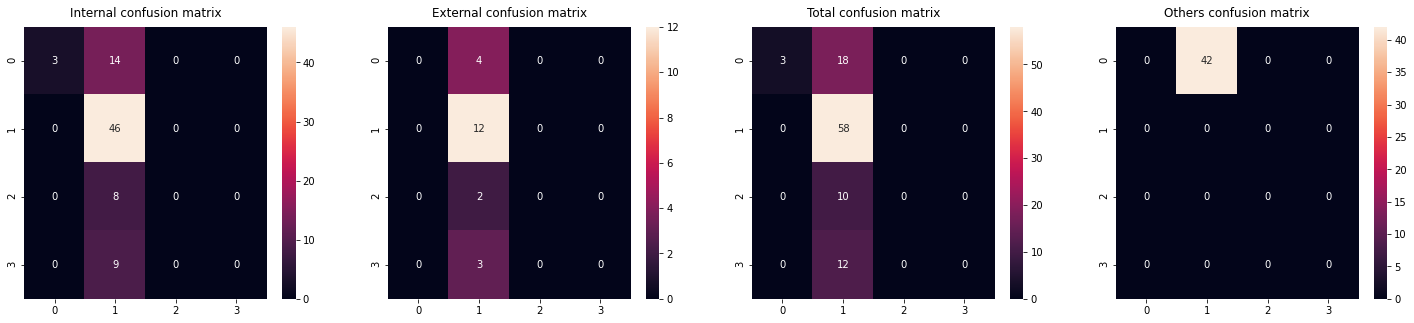

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, MaxAbsScaler,  QuantileTransformer
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive')

seed=0
np.random.seed(seed)

#데이터 입력
df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/MORDRED_2D/PA_morgan_2D_apppendscore_dropsmiles.csv')
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/MORDRED_2D/PAOthers_morgan_2D_apppendscore_dropsmiles.csv')

#데이터 분류
dataset = df.values
X = dataset[:,0:-1]
Y = dataset[:,-1]

data = data.values
X_others =data[:,0:-1]
Y_others =data[:,-1]

#print(X)

#Oversampling using SMOTE

#smote = SMOTE(random_state=seed)
#X_over, Y_over = smote.fit_resample(X, Y)

#데이터 전처리

scaler = RobustScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
X_others_scaled = scaler.transform(X_others)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2, random_state=seed)

#모델 생성

params = {'n_estimators': list(range(10,1000)), 'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,2000)), 
          'min_samples_split': list(range(2,100)), 'min_samples_leaf': list(range(1,100)), 'max_features': list(range(2,2000)),'max_leaf_nodes': list(range(1,2000))}
              
rf = RandomForestClassifier(n_jobs=-1, random_state=seed)
grid = RandomizedSearchCV(rf, params, n_iter=200, n_jobs=-1, cv=5, scoring='accuracy', random_state=seed)

grid.fit(train_input, train_target)

print("최적의 매개변수:\n{}\n".format(grid.best_params_))
#print("최상의 교차 검증 점수:{:.2f}".format(np.max(grid.cv_results_['mean_test_score'])))

#scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
#print(np.mean(scores['train_score']), np.mean(scores['test_score']))

rf_results = pd.DataFrame(grid.cv_results_)
rf_results.to_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/RandomForest_cv_results(0407).csv',index=False) 
rf_best = grid.best_estimator_

#confusion matrix 구하기

pred = rf_best.predict(train_input)
accuracy = accuracy_score(train_target, pred)
print('랜덤 포레스트 내부 정확도: {0:.4f}'.format(accuracy))
conf_matrix = confusion_matrix(train_target, pred, labels=[0,1,2,3])
print(conf_matrix)

pred2 = rf_best.predict(test_input)
accuracy = accuracy_score(test_target, pred2)
print('랜덤 포레스트 외부 정확도: {0:.4f}'.format(accuracy))
conf_matrix2 = confusion_matrix(test_target, pred2, labels=[0,1,2,3])
print(conf_matrix2)

pred3 = rf_best.predict(X)
accuracy = accuracy_score(Y, pred3)
print('랜덤 포레스트 전체 정확도: {0:.4f}'.format(accuracy))
conf_matrix3 = confusion_matrix(Y, pred3, labels=[0,1,2,3])
print(conf_matrix3)

pred4 = rf_best.predict(X_others)
accuracy = accuracy_score(Y_others, pred4)
print('랜덤 포레스트 Others 정확도: {0:.4f}'.format(accuracy))
conf_matrix4 = confusion_matrix(Y_others, pred4, labels=[0,1,2,3])
print(conf_matrix4)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(25, 5))
sns.heatmap(conf_matrix, annot=True, ax=ax[0])
ax[0].set_title('Internal confusion matrix', pad = 10)
sns.heatmap(conf_matrix2, annot=True, ax=ax[1])
ax[1].set_title('External confusion matrix', pad = 10)
sns.heatmap(conf_matrix3, annot=True, ax=ax[2])
ax[2].set_title('Total confusion matrix', pad = 10)
sns.heatmap(conf_matrix4, annot=True, ax=ax[3])
ax[3].set_title('Others confusion matrix', pad = 10)


#모델 저장
saved_model = joblib.dump(rf_best,'/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/PA_RandomForest_0407.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.0
[[ 0 35  0  7]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


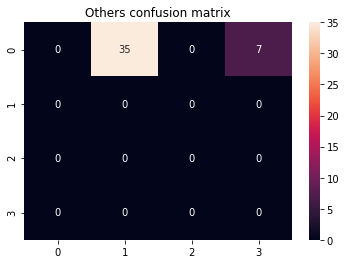

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive')

seed=0
np.random.seed(seed)

#데이터 입력
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/MORDRED_2D/PAOthers_morgan_2D_apppendscore_dropsmiles.csv')
df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/MORDRED_2D/PA_morgan_2D_apppendscore_dropsmiles.csv')

#데이터 분류

data = data.values
X_others = data[:,0:-1]
Y_others = data[:,-1]

dataset = df.values
X = dataset[:,0:-1]
Y = dataset[:,-1]

#Oversampling using SMOTE

smote = SMOTE(random_state=seed)
X_over, Y_over = smote.fit_sample(X, Y)

#데이터 전처리

scaler = StandardScaler()

scaler.fit(X_over)
X_scaled = scaler.transform(X_others)

#모델 로드

loaded_model = joblib.load('/content/drive/MyDrive/Inhibitor classification/Inhibitor/PA/PA_RandomForest_0406_01.pkl')
result = loaded_model.score(X_scaled, Y_others)
print(result)
pred = loaded_model.predict(X_scaled)
conf = confusion_matrix(Y_others, pred, labels=[0,1,2,3])
print(conf)

fig = plt.plot(figsize=(15, 5))
sns.heatmap(conf, annot=True)
plt.title('Others confusion matrix')
plt.show()